In [42]:
import pandas as pd
import datapackage
from pathlib import Path
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix


spotify_top_load = Path("Resources/universal_top_spotify_songs.csv")

# Read Universal_Top_Spotify_songs.csv
spotify_top = pd.read_csv(spotify_top_load)

# Import List of country codes
data_url = 'https://datahub.io/core/country-list/datapackage.json'

# to load Data Package into storage
package = datapackage.Package(data_url)

# to load only tabular data
resources = package.resources
for resource in resources:
    if resource.tabular:
        data = pd.read_csv(resource.descriptor['path'])
        print (data)


                  Name Code
0          Afghanistan   AF
1        Åland Islands   AX
2              Albania   AL
3              Algeria   DZ
4       American Samoa   AS
..                 ...  ...
244  Wallis and Futuna   WF
245     Western Sahara   EH
246              Yemen   YE
247             Zambia   ZM
248           Zimbabwe   ZW

[249 rows x 2 columns]
                  Name Code
0          Afghanistan   AF
1        Åland Islands   AX
2              Albania   AL
3              Algeria   DZ
4       American Samoa   AS
..                 ...  ...
244  Wallis and Futuna   WF
245     Western Sahara   EH
246              Yemen   YE
247             Zambia   ZM
248           Zimbabwe   ZW

[249 rows x 2 columns]


In [43]:
data = data.rename(columns={"Code":"country"})
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249 entries, 0 to 248
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Name     249 non-null    object
 1   country  248 non-null    object
dtypes: object(2)
memory usage: 4.0+ KB


In [44]:
spotify_top_complete = pd.merge(data,spotify_top, on="country")
spotify_top_complete.head()

,Name,country,spotify_id,name,artists,daily_rank,daily_movement,weekly_movement,snapshot_date,popularity,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,Argentina,AR,0Me3GyNuLOa1YTIxhJPyCn,ASI ES LA VIDA,"Enrique Iglesias, Maria Becerra",50,0,0,2023-10-24,81,...,3,-3.513,0,0.0556,0.6880,0.000002,0.1070,0.963,128.044,4
1,Argentina,AR,5FWQLEX0lavdxiWGBNkBQ4,Me Enteré,"Tiago PZK, TINI",49,0,1,2023-10-24,81,...,8,-3.814,1,0.1080,0.1210,0.000001,0.3140,0.612,140.978,3
2,Argentina,AR,4zYHsmc2V9RyR8eOA0mlx6,Penas de Antaño,"Bizarrap, Milo j",48,0,2,2023-10-24,83,...,7,-6.296,1,0.0933,0.6880,0.000104,0.2710,0.368,140.051,4
3,Argentina,AR,7BVMtLpd7edHeOizt4RWz9,Frágil,"Yahritza Y Su Esencia, Grupo Frontera",47,0,3,2023-10-24,79,...,6,-4.515,1,0.0309,0.3650,0.000000,0.1120,0.393,149.918,4
4,Argentina,AR,7w7BrPbOjF5OxChs2dxFve,En La Intimidad | CROSSOVER #1,"Big One, Emilia, Callejero Fino",46,0,4,2023-10-24,81,...,1,-4.991,1,0.1070,0.0924,0.000000,0.0699,0.640,89.946,4


In [45]:
spotify_top.head()

,spotify_id,name,artists,daily_rank,daily_movement,weekly_movement,country,snapshot_date,popularity,is_explicit,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,3LmvfNUQtglbTrydsdIqFU,We Belong Together,Mariah Carey,50,0,0,ZA,2023-10-24,73,False,...,0,-7.890,1,0.0601,0.0339,0.000000,0.090,0.762,139.986,4
1,0JXXNGljqupsJaZsgSbMZV,Sure Thing,Miguel,49,0,1,ZA,2023-10-24,90,False,...,11,-8.127,0,0.1000,0.0267,0.000307,0.191,0.498,81.001,4
2,6HmiaxYKrzq3sU2M0eFDg2,BETTER NOW,A-Reece,48,0,2,ZA,2023-10-24,50,True,...,1,-7.524,1,0.1660,0.1300,0.000031,0.121,0.725,83.001,4
3,4rXLjWdF2ZZpXCVTfWcshS,fukumean,Gunna,47,0,3,ZA,2023-10-24,96,True,...,1,-6.747,0,0.0903,0.1190,0.000000,0.285,0.220,130.001,4
4,4iZ4pt7kvcaH6Yo8UoZ4s2,Snooze,SZA,46,0,4,ZA,2023-10-24,92,True,...,5,-7.231,1,0.1320,0.1410,0.000000,0.110,0.392,143.008,4


In [46]:
spotify_top.shape

(25473, 25)

In [47]:
#spotify_top_complete_v1 = spotify_top_complete[spotify_top_complete['country'].notna()]
spotify_top_complete_v1 = spotify_top_complete.dropna(subset=['country','name'])
spotify_top_complete_v1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25122 entries, 0 to 25472
Data columns (total 26 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                25122 non-null  object 
 1   country             25122 non-null  object 
 2   spotify_id          25122 non-null  object 
 3   name                25122 non-null  object 
 4   artists             25122 non-null  object 
 5   daily_rank          25122 non-null  int64  
 6   daily_movement      25122 non-null  int64  
 7   weekly_movement     25122 non-null  int64  
 8   snapshot_date       25122 non-null  object 
 9   popularity          25122 non-null  int64  
 10  is_explicit         25122 non-null  bool   
 11  duration_ms         25122 non-null  int64  
 12  album_name          25122 non-null  object 
 13  album_release_date  25122 non-null  object 
 14  danceability        25122 non-null  float64
 15  energy              25122 non-null  float64
 16  key      

In [48]:
spotify_top_complete_v2 = spotify_top_complete_v1.loc[spotify_top_complete_v1['snapshot_date'] == '2023-10-24']
spotify_top_complete_v2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3577 entries, 0 to 25172
Data columns (total 26 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                3577 non-null   object 
 1   country             3577 non-null   object 
 2   spotify_id          3577 non-null   object 
 3   name                3577 non-null   object 
 4   artists             3577 non-null   object 
 5   daily_rank          3577 non-null   int64  
 6   daily_movement      3577 non-null   int64  
 7   weekly_movement     3577 non-null   int64  
 8   snapshot_date       3577 non-null   object 
 9   popularity          3577 non-null   int64  
 10  is_explicit         3577 non-null   bool   
 11  duration_ms         3577 non-null   int64  
 12  album_name          3577 non-null   object 
 13  album_release_date  3577 non-null   object 
 14  danceability        3577 non-null   float64
 15  energy              3577 non-null   float64
 16  key       

In [49]:

countries = ['MX','CO','CL','US','CA','KR','TW','SG','FR','GB','RO']
spotify_top_complete_v3 =  spotify_top_complete_v2[spotify_top_complete_v2['country'].isin(countries)]
spotify_top_complete_v3
                                

,Name,country,spotify_id,name,artists,daily_rank,daily_movement,weekly_movement,snapshot_date,popularity,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
2800,Canada,CA,0PAcdVzhPO4gq1Iym9ESnK,Thinkin’ Bout Me,Morgan Wallen,50,0,0,2023-10-24,86,...,3,-5.775,0,0.0308,0.492000,0.000000,0.117,0.429,139.971,4
2801,Canada,CA,67nepsnrcZkowTxMWigSbb,MELTDOWN (feat. Drake),"Travis Scott, Drake",49,0,1,2023-10-24,91,...,7,-5.275,0,0.3510,0.012000,0.000000,0.396,0.397,111.975,4
2802,Canada,CA,2QjOHCTQ1Jl3zawyYOpxh6,Sweater Weather,The Neighbourhood,48,0,2,2023-10-24,93,...,10,-2.810,1,0.0336,0.049500,0.017700,0.101,0.398,124.053,4
2803,Canada,CA,3F5CgOj3wFlRv51JsHbxhe,Jimmy Cooks (feat. 21 Savage),"Drake, 21 Savage",47,0,3,2023-10-24,90,...,0,-4.711,1,0.1750,0.000307,0.000002,0.093,0.366,165.921,4
2804,Canada,CA,1dGr1c8CrMLDpV6mPbImSI,Lover,Taylor Swift,46,0,4,2023-10-24,92,...,7,-7.582,1,0.0919,0.492000,0.000016,0.118,0.453,68.534,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24118,United States,US,4KULAymBBJcPRpk1yO4dOG,I Remember Everything (feat. Kacey Musgraves),"Zach Bryan, Kacey Musgraves",5,0,45,2023-10-24,94,...,0,-7.746,1,0.0459,0.554000,0.000002,0.102,0.155,77.639,4
24119,United States,US,4MjDJD8cW7iVeWInc2Bdyj,MONACO,Bad Bunny,4,0,46,2023-10-24,95,...,4,-5.009,0,0.0680,0.150000,0.000402,0.580,0.130,139.056,4
24120,United States,US,56y1jOTK0XSvJzVv9vHQBK,Paint The Town Red,Doja Cat,3,0,47,2023-10-24,88,...,2,-7.683,0,0.1940,0.255000,0.000004,0.112,0.726,99.974,4
24121,United States,US,1BxfuPKGuaTgP7aM0Bbdwr,Cruel Summer,Taylor Swift,2,0,48,2023-10-24,100,...,9,-5.707,1,0.1570,0.117000,0.000021,0.105,0.564,169.994,4


In [50]:
spotify_top_complete_v2['Name'].unique()

array(['Argentina', 'Australia', 'Austria', 'Belarus', 'Belgium',
       'Bolivia, Plurinational State of', 'Brazil', 'Bulgaria', 'Canada',
       'Chile', 'Colombia', 'Costa Rica', 'Czech Republic', 'Denmark',
       'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador', 'Estonia',
       'Finland', 'France', 'Germany', 'Greece', 'Guatemala', 'Honduras',
       'Hong Kong', 'Hungary', 'Iceland', 'India', 'Indonesia', 'Ireland',
       'Israel', 'Italy', 'Japan', 'Kazakhstan', 'Korea, Republic of',
       'Latvia', 'Lithuania', 'Luxembourg', 'Malaysia', 'Mexico',
       'Morocco', 'Netherlands', 'New Zealand', 'Nicaragua', 'Nigeria',
       'Norway', 'Pakistan', 'Panama', 'Paraguay', 'Peru', 'Philippines',
       'Poland', 'Portugal', 'Romania', 'Saudi Arabia', 'Singapore',
       'Slovakia', 'South Africa', 'Spain', 'Sweden', 'Switzerland',
       'Taiwan, Province of China', 'Thailand', 'Turkey', 'Ukraine',
       'United Arab Emirates', 'United Kingdom', 'United States',
       'U

In [51]:
# Asia =  Korea, Republic of , Taiwan , Singapore
# LatinAmerica = Mexico , Colombia , Chile
# Europa = France, United Kingdom ,  Romania
# North America = United States , Canada

In [52]:
spotify_top_complete_v3.to_csv("output_data/spotify_v3.csv")

/var/folders/vf/5t0z3x6j7z14ggb8h84tgcsc0000gn/T/ipykernel_9987/1540896834.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spotify_top_complete_v3['region'] = spotify_top_complete_v3['country'].map(country_to_region)


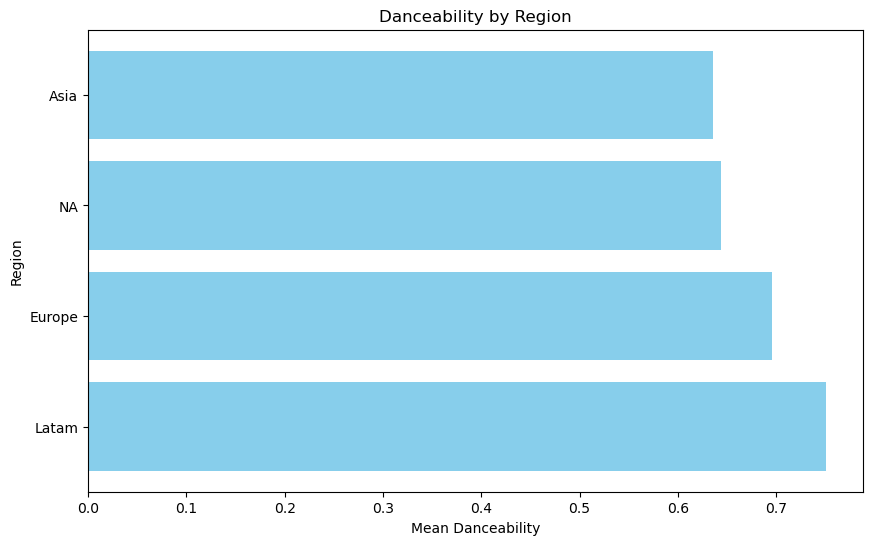

In [53]:

# Define a dictionary to map countries to regions
country_to_region = {
    'KR': 'Asia',
    'TW': 'Asia',
    'SG': 'Asia',
    'MX': 'Latam',
    'CO': 'Latam',
    'CL': 'Latam',
    'FR': 'Europe',
    'GB': 'Europe',
    'RO': 'Europe',
    'US': 'NA',
    'CA': 'NA'
}

# Add the "region" column based on the mapping
spotify_top_complete_v3['region'] = spotify_top_complete_v3['country'].map(country_to_region)


#spotify_top_complete_v3.to_csv("output_data/spotify_v4.csv")

country_danceability = spotify_top_complete_v3.groupby('region')['danceability'].mean().reset_index()
country_danceability = country_danceability.sort_values(by='danceability', ascending=False)

plt.figure(figsize=(10,6))
plt.barh(country_danceability['region'], country_danceability['danceability'], color='skyblue')
plt.title('Danceability by Region')
plt.xlabel('Mean Danceability')
plt.ylabel('Region')

plt.show()






In [54]:
most_popular_song = spotify_top_complete_v3[spotify_top_complete_v3['popularity'] ==spotify_top_complete_v3['popularity'].max()]

# Display the most popular song
print(most_popular_song)

                            Name country              spotify_id  \
2846                      Canada      CA  1BxfuPKGuaTgP7aM0Bbdwr   
19918                  Singapore      SG  1BxfuPKGuaTgP7aM0Bbdwr   
22007  Taiwan, Province of China      TW  1BxfuPKGuaTgP7aM0Bbdwr   
23767             United Kingdom      GB  1BxfuPKGuaTgP7aM0Bbdwr   
24121              United States      US  1BxfuPKGuaTgP7aM0Bbdwr   

               name       artists  daily_rank  daily_movement  \
2846   Cruel Summer  Taylor Swift           4               0   
19918  Cruel Summer  Taylor Swift           5               0   
22007  Cruel Summer  Taylor Swift          16               0   
23767  Cruel Summer  Taylor Swift           6               0   
24121  Cruel Summer  Taylor Swift           2               0   

       weekly_movement snapshot_date  popularity  ...  loudness  mode  \
2846                46    2023-10-24         100  ...    -5.707     1   
19918               45    2023-10-24         100  ... 

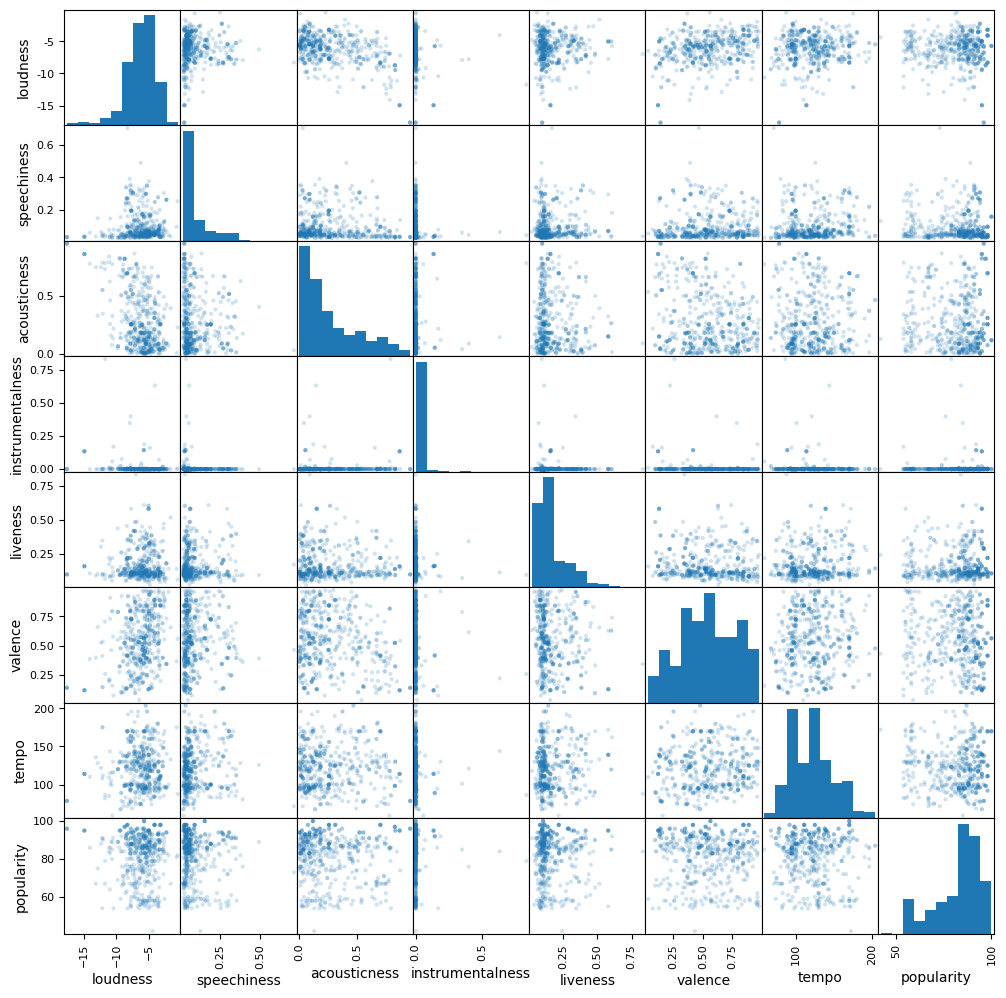

In [55]:
selected_columns = ["loudness", "speechiness", "acousticness", "instrumentalness", "liveness", "valence", "tempo", "popularity"]

# Create a DataFrame with the selected columns
selected_data = spotify_top_complete_v3[selected_columns]

# Create the scatter matrix
scatter_matrix(selected_data, alpha=0.2, figsize=(12, 12))

# Show the plot
plt.show()


In [56]:
# Top 15 songs by popularity globally
grouped =spotify_top_complete_v2.groupby('name')['popularity'].sum().reset_index()

# Sort the grouped DataFrame by popularity in descending order
top_songs = grouped.sort_values(by='popularity', ascending=False)

# Display the top 15 songs
top_15_songs = top_songs.head(15)
print(top_15_songs)

                                                   name  popularity
1185                                        Si No Estás        4171
1507                                             greedy        4116
1242                                          Strangers        3822
996                                  Paint The Town Red        3696
1173                Seven (feat. Latto) (Explicit Ver.)        3038
301                                        Cruel Summer        3000
1440                                              Water        2511
343                                            Daylight        2375
593                                  IDGAF (feat. Yeat)        2325
876                               My Love Mine All Mine        2280
1447  What Was I Made For? [From The Motion Picture ...        2208
800                                              MONACO        2185
1226                                           Sprinter        2068
1036                                            

In [57]:
# Top 15 songs by popularity of 10 countries
grouped =spotify_top_complete_v3.groupby('name')['popularity'].sum().reset_index()

# Sort the grouped DataFrame by popularity in descending order
top_songs2 = grouped.sort_values(by='popularity', ascending=False)

# Display the top 15 songs
top_15_songs2 = top_songs2.head(15)
print(top_15_songs2)

                                                  name  popularity
205                                 Paint The Town Red         704
328                                             greedy         686
271                                          Strangers         588
60                                        Cruel Summer         500
254                Seven (feat. Latto) (Explicit Ver.)         490
256                                        Si No Estás         485
181                              My Love Mine All Mine         475
172                                             MONACO         475
309                                              Water         465
278                                           TOO MUCH         430
325                                           fukumean         384
310  What Was I Made For? [From The Motion Picture ...         384
332                                            vampire         384
65             Dance The Night - From Barbie The Album        

In [59]:
# Top 15 artists by popularity globally
grouped =spotify_top_complete_v2.groupby('artists')['popularity'].sum().reset_index()

# Sort the grouped DataFrame by popularity in descending order
top_15_artists = grouped.sort_values(by='popularity', ascending=False)

# Display the top 15 artists
top_15_artists = top_15_artists.head(15)
print(top_15_artists)

               artists  popularity
151          Bad Bunny       11554
1175      Taylor Swift        6572
348           Doja Cat        4565
197   Bizarrap, Milo j        4396
1366    iñigo quintero        4171
1173        Tate McRae        4116
648        Kenya Grace        3822
609   Jung Kook, Latto        3038
1256                 V        3036
616            KAROL G        2823
1239              Tyla        2511
317      David Kushner        2375
365        Drake, Yeat        2325
918     Olivia Rodrigo        2284
832             Mitski        2280


In [60]:
# Top 15 artists by popularity of 10 countries
grouped =spotify_top_complete_v3.groupby('artists')['popularity'].sum().reset_index()

# Sort the grouped DataFrame by popularity in descending order
top_15_artists2 = grouped.sort_values(by='popularity', ascending=False)

# Display the top 15 artists
top_15_artists2 = top_15_artists2.head(15)
print(top_15_artists2)

              artists  popularity
220      Taylor Swift        2081
20          Bad Bunny        1081
59           Doja Cat        1020
242                 V         996
165          NewJeans         969
145   Lim Young Woong         797
100               IVE         797
218        Tate McRae         686
175    Olivia Rodrigo         664
203               SZA         644
125           KAROL G         606
160     Morgan Wallen         602
116             Jimin         600
132       Kenya Grace         588
37   Bizarrap, Milo j         528
